In [1]:
import tensorflow as tf
import os

C:\python3.9.7\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.2.0)/charset_normalizer (2.0.9) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# Easy Explanation - Understanding Convolutional Neural Networks (CNNs)

In the second notebook, we dived into the basics of Convolutional Neural Networks (CNNs). s. It isn’t possible to train a convnet to solve a
 complex problem with just a few tens of samples, but a few hundred can potentially
 suffice if the model is small and well regularized and the task is simple.
 Now, let's break down the main difference between two types of layers: densely connected layers and convolutional layers.
  Because conv
nets learn local, translation-invariant features, they’re highly data efficient on percep
tual problems. Training a convnet from scratch on a very small image dataset will still
 yield reasonable results despite a relative lack of data, without the need for any custom
 feature engineering. You’ll see this in action in this section.
 What’s more, deep-learning models are by nature highly
 

1. **Densely Connected Layer vs. Convolutional Layer:**
   - **Dense Layer:** Learns global patterns in the entire input space, considering all pixels. 
   - **Convolutional Layer:** Learns local patterns, making it great for recognizing specific features in different parts of an image.

2. **Key Properties of Convolutional Layers:**
   - Patterns learned are translation invariant (recognize patterns no matter where they are in the image).
   - They can learn hierarchies of patterns, understanding complex structures in an image.

3. **Understanding Convolution Operation:**
   - Extracts patches from the input image and applies the same transformation to all of them.
   - Produces an output feature map with width, height, and depth.
   - Depth represents different filters, not colors as in RGB.

4. **CNN Model Construction Steps:**
   - Sequentially add layers, starting with a convolutional layer.
   - Specify parameters like depth, patch size, activation function, and input shape.
   - Add a pooling layer to downsample the data.
   - Follow with more convolutional layers and max-pooling.

5. **Convolution Process:**
   - Uses windows of size 3x3 or 5x5 to slide over the input, extracting patches.
   - Each patch is transformed using learned weights into a 1D vector.
   - These vectors are reassembled into a 3D output map.

6. **Model Training:**
   - The output from the last convolutional layer is flattened.
   - Fed into densely connected layers, with the last having two parameters for binary classification.
   - Model is compiled with optimizer, epoch count, batch size, and loss function.
   - Trained using the fit method with training images and labels, tracking accuracy.

7. **Next Steps:**
   - Achieved 65% accuracy in this notebook.
   - Future notebook focuses on improving model performance and exploring advanced techniques.

In [2]:
from keras.preprocessing import image
from keras.utils import to_categorical
import numpy as np
import os


def image_to_array(paths):
    tensor = []
    for path in os.listdir(paths):
        img_path = os.path.join(paths,path)
        for file in os.listdir(img_path):
            img = image.load_img(os.path.join(img_path,file),target_size=(150,150,3))
            img_arr = image.img_to_array(img)
            tensor.append(img_arr)
    tensor = np.array(tensor)
    tensor = tensor.astype('float32')/255
        
    return tensor

def creating_label(sample):
    zero = np.zeros(sample)
    zero = list(zero)
    one = np.ones(sample)
    one = list(one)
    zero.extend(one)
    zero = np.array(zero)
    label = zero.astype('uint8')
    return label

train_images = image_to_array("formal_and_informal_img/train/")
test_images = image_to_array("formal_and_informal_img/test/")

train_labels= creating_label(500)
test_labels = creating_label(100)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(2,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [6]:
from keras import optimizers 
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [7]:
model.fit(train_images,train_labels,epochs=5,batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/5



16/16 [==============================] - 22s 1s/step - loss: 0.7524 - acc: 0.5020
Epoch 2/5
16/16 [==============================] - 21s 1s/step - loss: 0.6925 - acc: 0.5390
Epoch 3/5
16/16 [==============================] - 18s 1s/step - loss: 0.6925 - acc: 0.5610
Epoch 4/5
16/16 [==============================] - 17s 1s/step - loss: 0.6842 - acc: 0.6170
Epoch 5/5
7/7 [==============================] - 1s 129ms/step - loss: 0.6818 - acc: 0.6100


# Without Data Augmentation CNN : : 0.6100

In [8]:
import matplotlib.pyplot as plt
def predict_output(p):
    im = image.load_img(p,target_size=(150,150,3))
    im = image.img_to_array(im)
    im = np.array(im)
    t = []
    t.append(im)
    t = np.array(t)
    im = t.astype('float32')/255
    output = model.predict(im)[0]
    zero = "formal"
    one = "informal"
    print(output)

    if output[0]>output[1]:
        print(zero)
    else:
        print(one)

p = "C:/Users/rani/Desktop/Documents/Rani_Rathore_2020PUSCEBAIX08719.jpg"
image.load_img(p)

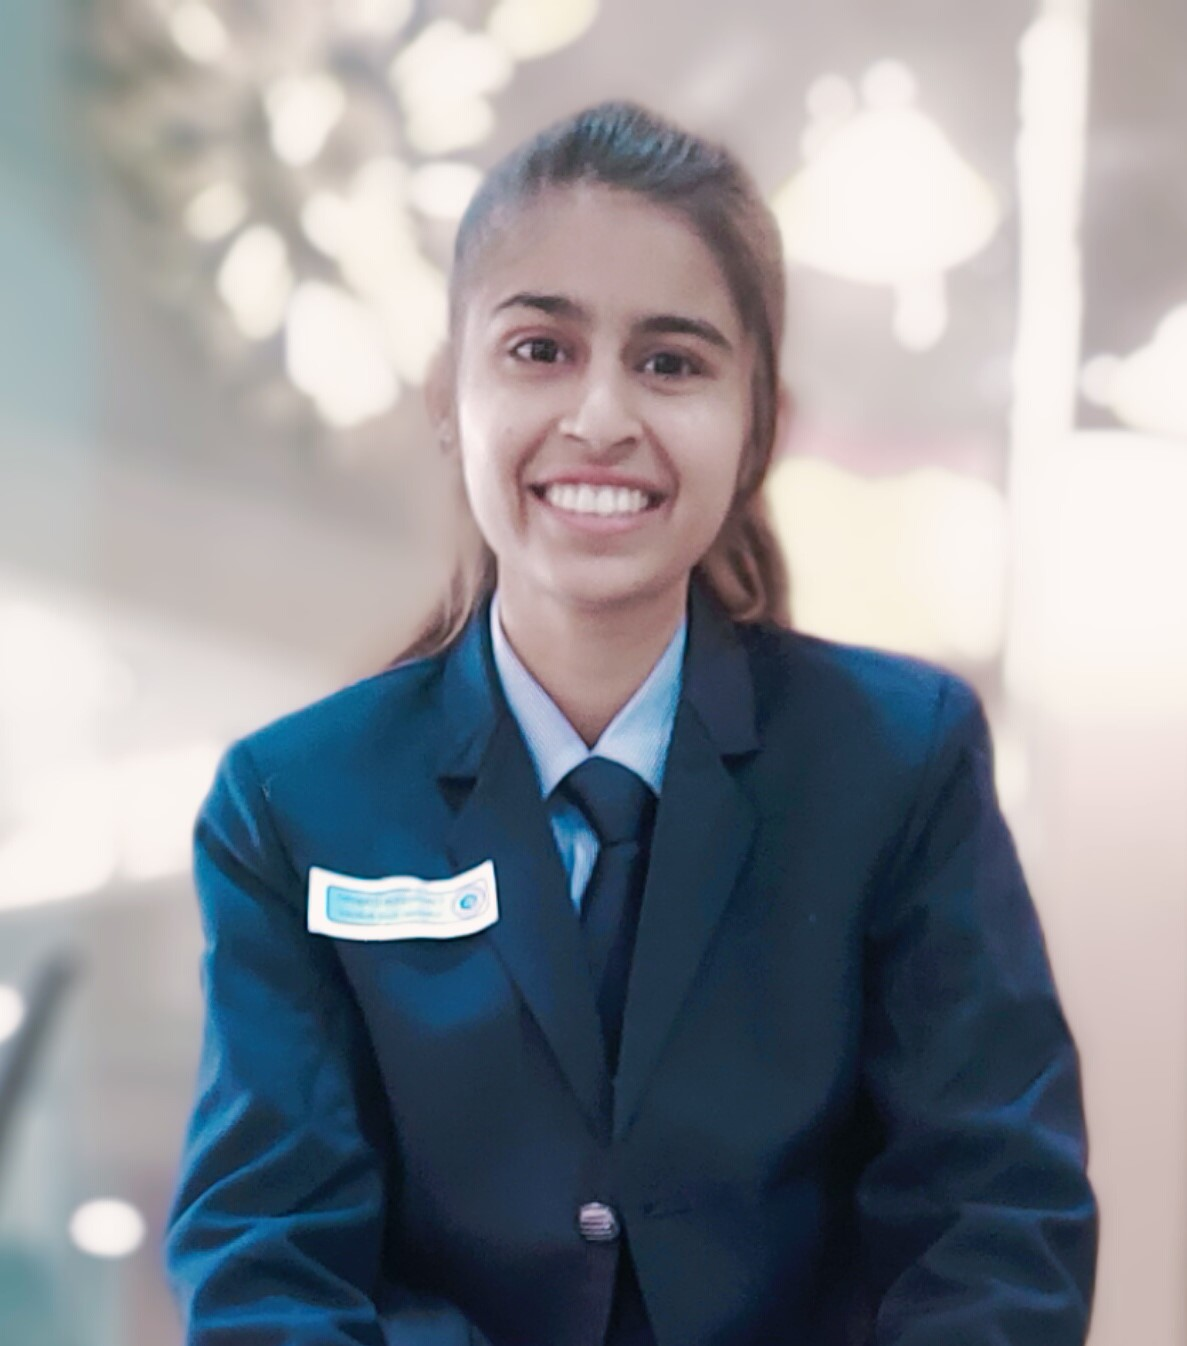

In [29]:
predict_output(p)

1/1 [==============================] - 0s 61ms/step
[0.8992832  0.10071685]
formal


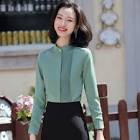

In [10]:
p = "Dataset/formal_707.jpg"
image.load_img(p)

In [11]:
predict_output(p)

1/1 [==============================] - 0s 324ms/step
[0.7179716 0.2861252]
formal
